Total images found: 800
Visualizing original PNG images...


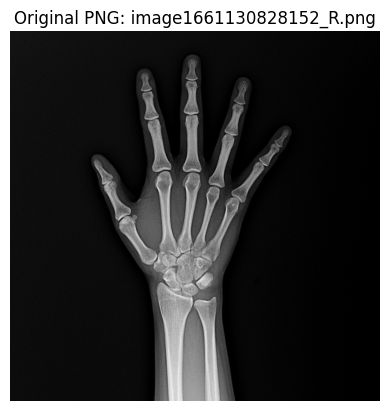

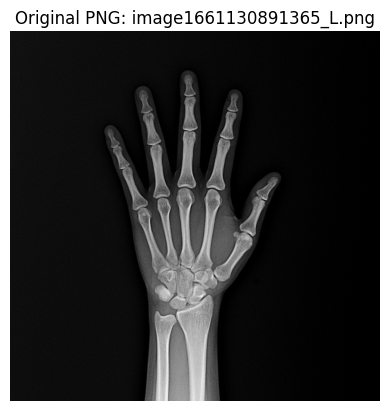

In [ ]:
import os
import numpy as np
import SimpleITK as sitk
from PIL import Image
import matplotlib.pyplot as plt

# Define input and output paths
input_folder_path = '/data/ephemeral/home/dataset_nnunet/train/images'
output_nifti_path = '/data/ephemeral/home/dataset_nnunet/train/train_images_combined.nii.gz'

# Step 1: Load and sort images
def load_and_sort_images(input_folder):
    """
    Load PNG images from a folder and sort them naturally.
    """
    png_files = sorted(
        [f for f in os.listdir(input_folder) if f.lower().endswith(".png")],
        key=lambda x: int(''.join(filter(str.isdigit, x)))  # Sort by numeric part of filenames
    )
    if not png_files:
        raise ValueError(f"No PNG files found in the folder: {input_folder}")
    
    print(f"Total images found: {len(png_files)}")
    return png_files

# Step 2: Stack images into a 3D volume
def stack_images_to_volume(input_folder, png_files):
    """
    Stack sorted PNG images into a 3D NumPy array.
    """
    image_slices = []
    for filename in png_files:
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img_np = np.array(img, dtype=np.uint8)  # Ensure consistent data type
        image_slices.append(img_np)

    # Stack slices along the depth axis
    volume_np = np.stack(image_slices, axis=0)  # Depth-first stacking
    print(f"Volume shape: {volume_np.shape}")
    return volume_np

# Step 3: Save as NIfTI file
def save_volume_as_nifti(volume_np, output_path):
    """
    Save a 3D NumPy array as a NIfTI (.nii.gz) file.
    """
    sitk_image = sitk.GetImageFromArray(volume_np)  # Convert NumPy array to SimpleITK image
    sitk_image.SetSpacing((1.0, 1.0, 1.0))  # Set spacing (adjust if necessary)
    sitk.WriteImage(sitk_image, output_path)
    print(f"NIfTI file saved at: {output_path}")

# Step 4: Visualize original images
def visualize_original_images(input_folder, png_files):
    """
    Visualize the first few original PNG images.
    """
    print("Visualizing original PNG images...")
    for i, filename in enumerate(png_files[:2]):  # Show first 5 images
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path)
        plt.imshow(img, cmap='gray')
        plt.title(f"Original PNG: {filename}")
        plt.axis("off")
        plt.show()

# Step 5: Visualize slices from NIfTI file
def visualize_nifti_slices(nifti_path):
    """
    Visualize slices from a NIfTI file to verify integrity.
    """
    sitk_image = sitk.ReadImage(nifti_path)
    volume_np = sitk.GetArrayFromImage(sitk_image)  # Get 3D volume as NumPy array
    print(f"NIfTI volume shape: {volume_np.shape}")
    
    print("Visualizing NIfTI slices...")
    for i in range(1, volume_np.shape[0], 10):  # Show every 10th slice
        plt.imshow(volume_np[i, :, :], cmap="gray")
        plt.title(f"NIfTI Slice {i}")
        plt.axis("off")
        plt.show()

# Main script
if __name__ == "__main__":
    # Load and sort PNG images
    png_files = load_and_sort_images(input_folder_path)

    # Visualize original images
    visualize_original_images(input_folder_path, png_files)

    # Stack images into a 3D volume
    volume_np = stack_images_to_volume(input_folder_path, png_files)

    # Save the 3D volume as a NIfTI file
    save_volume_as_nifti(volume_np, output_nifti_path)

    # Visualize slices from the saved NIfTI file
    visualize_nifti_slices(output_nifti_path)
